In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [2]:
seed = 5
data_path = "ObesityDataSet_raw_and_data_sinthetic.csv"

In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)


data.describe()

# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dbd04588>,
      dtype=object)

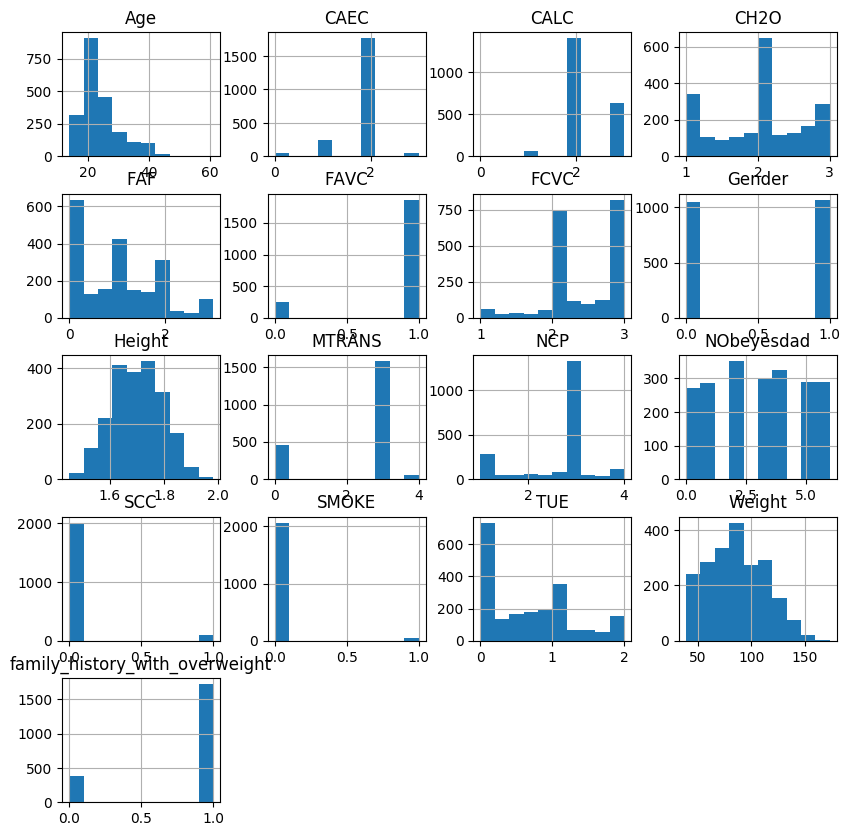

In [4]:
# draw hist for dataset
data.hist(figsize=(10, 10))

In [5]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [6]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(1688, 16)
(423, 16)
(1688,)
(423,)


In [7]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)

# Section 5: SVM

In [9]:
C_values = np.arange(0.001, 2.5, 0.25)
tol = [10 ** -x for x in np.arange(1.0, 8.0)]

params = {'kernel':['rbf', 'sigmoid', 'linear'], 'C': C_values, 'tol': tol, 'class_weight': ['balanced']}


Use grid search to find best params. Take a few minutes.

In [11]:
from sklearn import svm
from sklearn.base import BaseEstimator


SVM_classifier = svm.SVC()

grid_seacher = sklearn.model_selection.GridSearchCV(SVM_classifier, n_jobs=40, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=make_scorer(accuracy_score))
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.1 .............
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.1 .............[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.1 .............
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.1 .............
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.1, score=0.1348973607038123, total=   5.4s
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.1 .............

[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.1, score=0.13529411764705881, total=   4.9s

[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.1, score=0.1394658753709199, total=  10.4s[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.13489

[Parallel(n_jobs=40)]: Done   5 tasks      | elapsed:   47.7s



[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.13529411764705881, total=   5.2s

[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.1394658753709199, total=   9.3s
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.001, score=0.13529411764705881, total=   7.7s
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.22023809523809523, total=   5.0s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.1394658753709199, total=   0.3s
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.001, score=0.1347305389221557, total=   1.7s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.1348973607038123, total=   1.8s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.001, score=0.22023809523809523, total=   4.0s[CV]  C=0.001, class_weight=balanced, kernel=rbf, t

[Parallel(n_jobs=40)]: Done  18 tasks      | elapsed:  1.1min




[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.22023809523809523, total=   6.6s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.13529411764705881, total=   5.5s
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.13529411764705881, total=   3.0s
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.22023809523809523, total=   2.6s
[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=1e-07 ...........[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=1e-07 ...........
[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.1394658753709199, total=   5.8s[CV] C=0.001, class_weight=balanced, kernel=rbf, tol=1e-07 ...........




[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.1394658753709199, total=   4.5s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.1347305389221557, total=   5.2s[CV]  C=0.001, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.13473

[Parallel(n_jobs=40)]: Done  33 tasks      | elapsed:  1.4min


[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.1 .........[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.1348973607038123, total=   2.9s
[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01 ........
[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.1394658753709199, total=   1.9s

[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01 ........


[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01 ........[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.1348973607038123, total=   0.4s

[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.13529411764705881, total=   3.8s[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01 ........
[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.1394658753709199, total=   2.0s[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.18154761904761904, total=   2.9s[CV] C=0.001, class_weig

[Parallel(n_jobs=40)]: Done  48 tasks      | elapsed:  1.8min



[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.1348973607038123, total=   4.5s[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......
[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.18154761904761904, total=   2.7s[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.13529411764705881, total=   4.2s
[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.1394658753709199, total=   5.1s[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......
[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......






[CV] C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.1348

[Parallel(n_jobs=40)]: Done  65 tasks      | elapsed:  2.2min


[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.1 ..........

[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.1, score=0.49117647058823527, total=   0.5s[CV]  C=0.001, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.1347305389221557, total=   1.5s


[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.01 .........[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.1, score=0.47023809523809523, total=   0.7s[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.1 ..........
[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.1, score=0.5103857566765578, total=   3.7s[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.01 .........

[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.01, score=0.46920821114369504, total=   0.2s

[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.01, score=0.5, total=   0.3s

[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.01 .........
[CV] C=0.001, class_weight=balanced, k

[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:  2.4min


[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.0001 .......

[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.0001 .......[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.0001 .......[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.0001 .......
[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.47214076246334313, total=   0.4s
[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.001, score=0.47904191616766467, total=   0.2s
[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.0001 .......
[CV] C=0.001, class_weight=balanced, kernel=linear, tol=0.001 ........

[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.47904191616766467, total=   0.2s
[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.4896142433234421, total=   0.5s[CV]  C=0.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.4642857142857143, total=   0.5s

[CV]  C=0.001, class_weight=balanced, kernel=li

[Parallel(n_jobs=40)]: Done 101 tasks      | elapsed:  2.6min


[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=0.01 ............

[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=0.01 ............

[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.1, score=0.7922848664688428, total=   0.2s[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.1, score=0.811377245508982, total=   0.2s
[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=0.01 ............


[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.01, score=0.7712609970674487, total=   0.4s[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.01, score=0.7893175074183977, total=   0.3s[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.01, score=0.7852941176470588, total=   0.4s
[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........
[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.01, score=0.7529761904761905, total=   0.2s


[CV] C=0.251, class_weight=balanced, kernel=rb

[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:  2.7min


[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.7529761904761905, total=   0.4s[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.811377245508982, total=   0.3s

[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.7852941176470588, total=   0.3s
[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.7712609970674487, total=   0.5s


[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........

[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=1e-06 ...........
[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.7922848664688428, total=   0.2s[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.811377245508982, total=   0.2s[CV] C=0.251, class_weight=balanced, kernel=rbf, tol=1e-06 ...........
[CV]  C=0.251, class_weight=balanced, ke

[Parallel(n_jobs=40)]: Done 141 tasks      | elapsed:  2.8min


[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......


[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV]  C=0.251, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.811377245508982, total=   0.2s
[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......


[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.5970588235294118, total=   0.2s[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.6407185628742516, total=   0.2s[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.6451612903225806, total=   0.2s[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV] C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......

[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.6190476190476191, total

[Parallel(n_jobs=40)]: Done 162 tasks      | elapsed:  2.8min






[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.6407185628742516, total=   0.2s
[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.6, total=   0.3s[CV] C=0.251, class_weight=balanced, kernel=linear, tol=0.1 ..........

[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.6201780415430267, total=   0.2s[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.6422287390029325, total=   0.2s[CV] C=0.251, class_weight=balanced, kernel=linear, tol=0.1 ..........

[CV]  C=0.251, class_weight=balanced, kernel=linear, tol=0.1, score=0.9088235294117647, total=   0.1s[CV] C=0.251, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.5970588235294118, total=   0.2s



[CV]  C=0.251, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.6190476190476191, total=   0.2s
[CV] C=0.251, class_weight=balanced, kernel=linear, tol=0.01 .......

[Parallel(n_jobs=40)]: Done 185 tasks      | elapsed:  2.9min





[CV] C=0.251, class_weight=balanced, kernel=linear, tol=1e-06 ........


[CV]  C=0.251, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9178885630498533, total=   0.1s[CV] C=0.251, class_weight=balanced, kernel=linear, tol=1e-06 ........
[CV]  C=0.251, class_weight=balanced, kernel=linear, tol=0.001, score=0.9198813056379822, total=   0.8s[CV]  C=0.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9285714285714286, total=   0.3s[CV] C=0.251, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=0.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9088235294117647, total=   0.3s



[CV] C=0.251, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=0.251, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.1 .............[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.1 .............[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.1 .............

[CV] C=0.501, c

[Parallel(n_jobs=40)]: Done 208 tasks      | elapsed:  2.9min



[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.01, score=0.8802395209580839, total=   0.1s[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8357771260997068, total=   0.2s[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8323529411764706, total=   0.2s



[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8772455089820359, total=   0.2s

[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8160237388724035, total=   0.3s
[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8065476190476191, total=   0.2s



[CV] C=0.501, class_weight=balanced, kernel=rbf, tol=0.0001 ..........
[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.8357771260997068, total=   0.2s[CV] C=0.

[Parallel(n_jobs=40)]: Done 233 tasks      | elapsed:  2.9min



[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8802395209580839, total=   0.1s
[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.1 .........[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.8802395209580839, total=   0.2s
[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.1 .........




[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8323529411764706, total=   0.2s
[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.1 .........[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.1 .........[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8323529411764706, total=   0.5s

[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8065476190476191, total=   0.2s[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8357771260997068, total=   0.2s[CV]  C=0.501, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8160237388724035, total=   0.2s
[CV] C=0

[Parallel(n_jobs=40)]: Done 258 tasks      | elapsed:  2.9min





[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV]  C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.001, score=0.6137724550898204, total=   0.4s
[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......
[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......


[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......
[CV]  C=0.501, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.6279761904761905, total=   0.2s[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=0.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......
[CV] C=0.501, class_weight=balanced, kernel=linear, tol=0.1 ..........

[CV] C=0.501, class_weight=balanced, kernel=linear, tol=0.1 ..........

[CV] C=

[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:  3.0min







[CV] C=0.501, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9317507418397626, total=   0.1s[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9354838709677419, total=   0.1s


[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9523809523809523, total=   0.6s


[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=0.0001, score=0.937125748502994, total=   0.9s


[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9317507418397626, total=   0.9s
[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=1e-07, score=0.9264705882352942, total=   0.1s[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=0.001, score=0.937125748502994, total=   1.1s[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.1 .............
[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8592375366568915, total=   0.1s[CV]  C=0.501, class_weig

[Parallel(n_jobs=40)]: Done 312 tasks      | elapsed:  3.0min



[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.001 ...........


[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=0.001, score=0.9523809523809523, total=   1.3s
[CV]  C=0.501, class_weight=balanced, kernel=linear, tol=1e-07, score=0.9523809523809523, total=   0.4s



[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8558823529411764, total=   0.4s[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8219584569732937, total=   0.2s

[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.0001 ..........



[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8249258160237388, total=   0.4s[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=0.001, score=0.8592375366568915, total=   0.1s[CV] C=0.751, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=0.751, class_weight=balanc

[Parallel(n_jobs=40)]: Done 341 tasks      | elapsed:  3.0min


[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8592375366568915, total=   0.1s
[CV] C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8588235294117647, total=   0.2s[CV] C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........


[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8219584569732937, total=   0.2s[CV]  C=0.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8363095238095238, total=   0.2s
[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.6369047619047619, total=   0.2s[CV] C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........

[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5764705882352941, total=   0.2s[CV] C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........
[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.6158357771260997, total=   0.1s[CV] 

[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:  3.0min


[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5988023952095808, total=   0.2s
[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.6129032258064516, total=   0.2s[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.6129032258064516, total=   0.2s[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5764705882352941, total=   0.2s[CV] C=0.751, class_weight=balanced, kernel=linear, tol=0.1 ..........
[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5988023952095808, total=   0.2s


[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.6339285714285714, total=   0.2s[CV] C=0.751, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.6172106824925816, total=   0.2s[CV]  C=0.751, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.5988023952095808, total=   0.2s



[CV]  C=0.751, clas

[Parallel(n_jobs=40)]: Done 401 tasks      | elapsed:  3.1min



[CV] C=0.751, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9553571428571429, total=   0.1s[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9352941176470588, total=   0.1s


[CV] C=0.751, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9461077844311377, total=   0.1s[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9384164222873901, total=   0.1s
[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9406528189910979, total=   0.2s[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9406528189910979, total=   0.3s

[CV] C=0.751, class_weight=balanced, kernel=linear, tol=1e-07 ........

[CV] C=0.751, class_weight=balanced, kernel=linear, tol=1e-07 ........



[CV]  C=0.751, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9352941176470588

[Parallel(n_jobs=40)]: Done 432 tasks      | elapsed:  3.1min


[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8705882352941177, total=   0.2s[CV] C=1.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.8922155688622755, total=   0.2s
[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8768328445747801, total=   0.2s[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8922155688622755, total=   0.2s
[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8456973293768546, total=   0.3s

[CV] C=1.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV] C=1.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.8768328445747801, total=   0.3s[CV]  C=1.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8720238095238095, total=   0.1s




[CV] C=1.001, class_weight=balanced, kernel=rbf, tol=1e-07 ...........




[CV] 

[Parallel(n_jobs=40)]: Done 465 tasks      | elapsed:  3.1min


[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.6101190476190477, total=   0.1s[CV] C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.5816023738872403, total=   0.3s[CV] C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......
[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.5988023952095808, total=   0.1s
[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5806451612903226, total=   0.2s

[CV] C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......

[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5816023738872403, total=   0.2s[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5988023952095808, total=   0.1s[CV]  C=1.001, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5823529411764706, total=   0.2s[CV]  C=1.001, class_weight=balanced, kernel=sigmoid,

[Parallel(n_jobs=40)]: Done 498 tasks      | elapsed:  3.2min



[CV] C=1.001, class_weight=balanced, kernel=linear, tol=0.0001 .......[CV]  C=1.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9442815249266863, total=   0.1s

[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-05 ........


[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-05 ........



[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV]  C=1.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9382352941176471, total=   0.1s[CV]  C=1.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9406528189910979, total=   0.1s[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-05 ........

[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-06 ........

[CV] C=1.001, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=1.001, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9461077844311377, total=   0.2s
[CV] C=1.

[Parallel(n_jobs=40)]: Done 533 tasks      | elapsed:  3.2min






[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........
[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV]  C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.8885630498533724, total=   0.3s
[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........

[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........
[CV]  C=1.251, class_weight=balanced, kernel=rbf, tol=0.001, score=0.9011976047904192, total=   0.1s

[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........

[CV] C=1.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........
[CV]  C=1.251, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.8735294117647059, total=   0.2s[CV]  C=1.251, class_weight=balanced, kernel=rbf, tol=

[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  3.3min



[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......
[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......
[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV]  C=1.251, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.6041055718475073, total=   0.3s[CV]  C=1.251, class_weight=balanced, kernel=sigmoid, tol=0.0001, score=0.5588235294117647, total=   0.3s
[CV]  C=1.251, class_weight=balanced, kernel=sigmoid, tol=0.001, score=0.5688622754491018, total=   0.3s
[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......



[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......
[CV] C=1.251, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV]  C=1.251, class_weight=balanced, kernel=s

[Parallel(n_jobs=40)]: Done 605 tasks      | elapsed:  3.4min


[CV]  C=1.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9491017964071856, total=   0.1s[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-06 ........





[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=1.251, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9472140762463344, total=   0.2s[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-06 ........
[CV]  C=1.251, class_weight=balanced, kernel=linear, tol=0.001, score=0.9491017964071856, total=   1.0s



[CV]  C=1.251, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9523809523809523, total=   0.1s[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=1.251, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=1.501, class_weight=balanced, kernel=rbf, tol=0.1 .............[CV] C=1.501, class_weight=balanced, kernel=rbf, tol=0.1 .............
[CV] C=1.251, cl

[Parallel(n_jobs=40)]: Done 642 tasks      | elapsed:  3.4min









[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=0.01, score=0.8813056379821959, total=   1.8s
[CV] C=1.501, class_weight=balanced, kernel=rbf, tol=1e-07 ...........[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8705882352941177, total=   0.2s[CV] C=1.501, class_weight=balanced, kernel=rbf, tol=1e-07 ...........
[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.8856304985337243, total=   0.2s[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.9011976047904192, total=   0.2s

[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=1e-06, score=0.8988095238095238, total=   0.2s[CV] C=1.501, class_weight=balanced, kernel=rbf, tol=1e-07 ...........[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=0.0001, score=0.8813056379821959, total=   1.0s
[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=0.01, score=0.8988095238095238, total=   2.1s

[CV]  C=1.501, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8872403560

[Parallel(n_jobs=40)]: Done 681 tasks      | elapsed:  3.5min


[CV]  C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5578635014836796, total=   0.1s[CV]  C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5441176470588235, total=   0.2s[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......
[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06 .......






[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV]  C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.6041666666666666, total=   0.2s
[CV] C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......
[CV]  C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-05, score=0.5778443113772455, total=   0.2s[CV]  C=1.501,

[CV] C=1.751, class_weight=balanced, kernel=rbf, tol=0.01 ............


[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:  3.5min


[CV]  C=1.751, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8823529411764706, total=   0.1s[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=1e-07, score=0.9501466275659824, total=   0.7s

[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9501466275659824, total=   0.2s[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9520958083832335, total=   0.8s

[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9501466275659824, total=   0.7s[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=0.0001, score=0.9553571428571429, total=   1.3s[CV] C=1.751, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV]  C=1.501, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9520958083832335, total=   1.2s[CV]  C=1.501, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5578635014836796, total=   2.8s[CV]  C=1.751, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8931750741839762, total=   0.1s[CV]  

[Parallel(n_jobs=40)]: Done 761 tasks      | elapsed:  3.6min


[CV]  C=1.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.9041916167664671, total=   0.2s[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5483870967741935, total=   0.1s[CV] C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........





[CV] C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.01 ........

[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5588235294117647, total=   0.1s
[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5489614243323442, total=   0.2s[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.6011904761904762, total=   0.1s
[CV]  C=1.751, class_weight=balanced, kernel=rbf, tol=1e-07, score=0.8856304985337243, total=   0.2s[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5718562874251497, total=   0.1s



[CV]  C=1.751, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.5542521994134897, total=   0.2s[CV] C=1.751, class_weight=balanc

[Parallel(n_jobs=40)]: Done 802 tasks      | elapsed:  3.6min



[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.01 .........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.001 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.001 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.0001 .......[CV]  C=1.751, class_weight=balanced, kernel=linear, tol=0.1, score=0.9550898203592815, total=   0.4s[CV] C=1.751, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=1e-07 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.001 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.001 ........[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=0.01 ............[CV] C=1.751, class_weight=balanced, kernel=linear, tol=0.

[Parallel(n_jobs=40)]: Done 845 tasks      | elapsed:  3.7min





[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=1e-05 ...........[CV]  C=2.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8856304985337243, total=   0.1s[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........
[CV]  C=1.751, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9583333333333334, total=   0.1s

[CV]  C=2.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.8928571428571429, total=   0.1s

[CV]  C=2.001, class_weight=balanced, kernel=rbf, tol=0.01, score=0.8794117647058823, total=   0.1s[CV]  C=2.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8794117647058823, total=   0.1s
[CV]  C=2.001, class_weight=balanced, kernel=rbf, tol=1e-05, score=0.8991097922848664, total=   0.1s

[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV] C=2.001, class_weight=balanced, kernel=rbf, tol=1e-06 ...........[CV] C=2.001, class_weight=balanced, k

[CV] C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-07 .......[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5558823529411765, total=   0.1s[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=0.001, score=0.5806451612903226, total=   0.4s[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.1 ..........[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.1 ..........


[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.01 .........[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.01 .........
[CV] C=2.001, clas

[Parallel(n_jobs=40)]: Done 888 tasks      | elapsed:  3.7min








[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5806451612903226, total=   0.3s[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5519287833827893, total=   0.1s[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.001 ........[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.001 ........[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=0.001, score=0.5508982035928144, total=   0.7s[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.001 ........

[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-06, score=0.5982142857142857, total=   0.1s[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=0.01, score=0.5529411764705883, total=   0.8s


[CV] C=2.001, class_weight=balanced, kernel=linear, tol=0.0001 .......[CV]  C=2.001, class_weight=balanced, kernel=sigmoid, tol=1e-07, score=0.5806451612903226, total=   0.1s[CV]  C=2.001, class_weight=balanced, kernel=linear, tol=0.1, score=0.9406528189910979

[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  3.7min


[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.01 ............
[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........
[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........
[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.001 ...........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=0.0001 ..........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........[CV] C=2.251, class_weight=balanced, kernel=rbf, tol=1e-05 ...........






[CV]  C=2.251, class_weight=balanced, kernel=rbf, tol=0.1, score=0.8991097922848

[CV]  C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.1, score=0.5659824046920822, total=   0.4s[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.001 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......
[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=0.0001 ......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=1e-05 .......[CV] C=2.251, class_weight=balanced, kernel=sigmoid, tol=

[CV]  C=2.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9529411764705882, total=   0.2s
[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-05 ........
[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV]  C=2.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9495548961424333, total=   0.3s
[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-05 ........[CV]  C=2.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9523809523809523, total=   0.1s
[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-06 ........
[CV]  C=2.251, class_weight=balanced, kernel=linear, tol=1e-05, score=0.9580838323353293, total=   0.2s

[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-06 ........

[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV] C=2.251, class_weight=balanced, kernel=linear, tol=1e-06 ........[CV]  C=2.251, class_weight=balanced, kernel=linear, tol=1e-06, score=0.9560117302052786,

[Parallel(n_jobs=40)]: Done 1050 out of 1050 | elapsed:  4.0min finished


In [12]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 0.1}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 0.01}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 0.001}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 0.0001}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 1e-05}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 1e-06}
train: 0.155 (+/-0.070); test: 0.153 (+/-0.067) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf', 'tol': 1e-07}
train: 0.147 (+/-0.042); test: 0.145 (+/-0.036) for {'C': 0.001, 'class_weight': 'balanced', 'kernel': 's

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [14]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred, average="micro")))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred, average="micro")))
# print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(training_y, training_y_pred)))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 0.9678
Final accuracy score on the training data: 0.9686
Final precision score on training data: 0.9686
Final recall score on training data: 0.9686


The best parameters are: SVC(C=2.251, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.01, verbose=False)


# Results on testing set

In [15]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred, average="micro")))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred, average="micro")))
# print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(testing_y, testing_y_pred)))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.9647
Final accuracy score on the testing data: 0.9645
Final precision score on testing data: 0.9645
Final recall score on testing data: 0.9645


# Confusion Matrix for testing set

Text(0.5,110.486,'Predicted label')

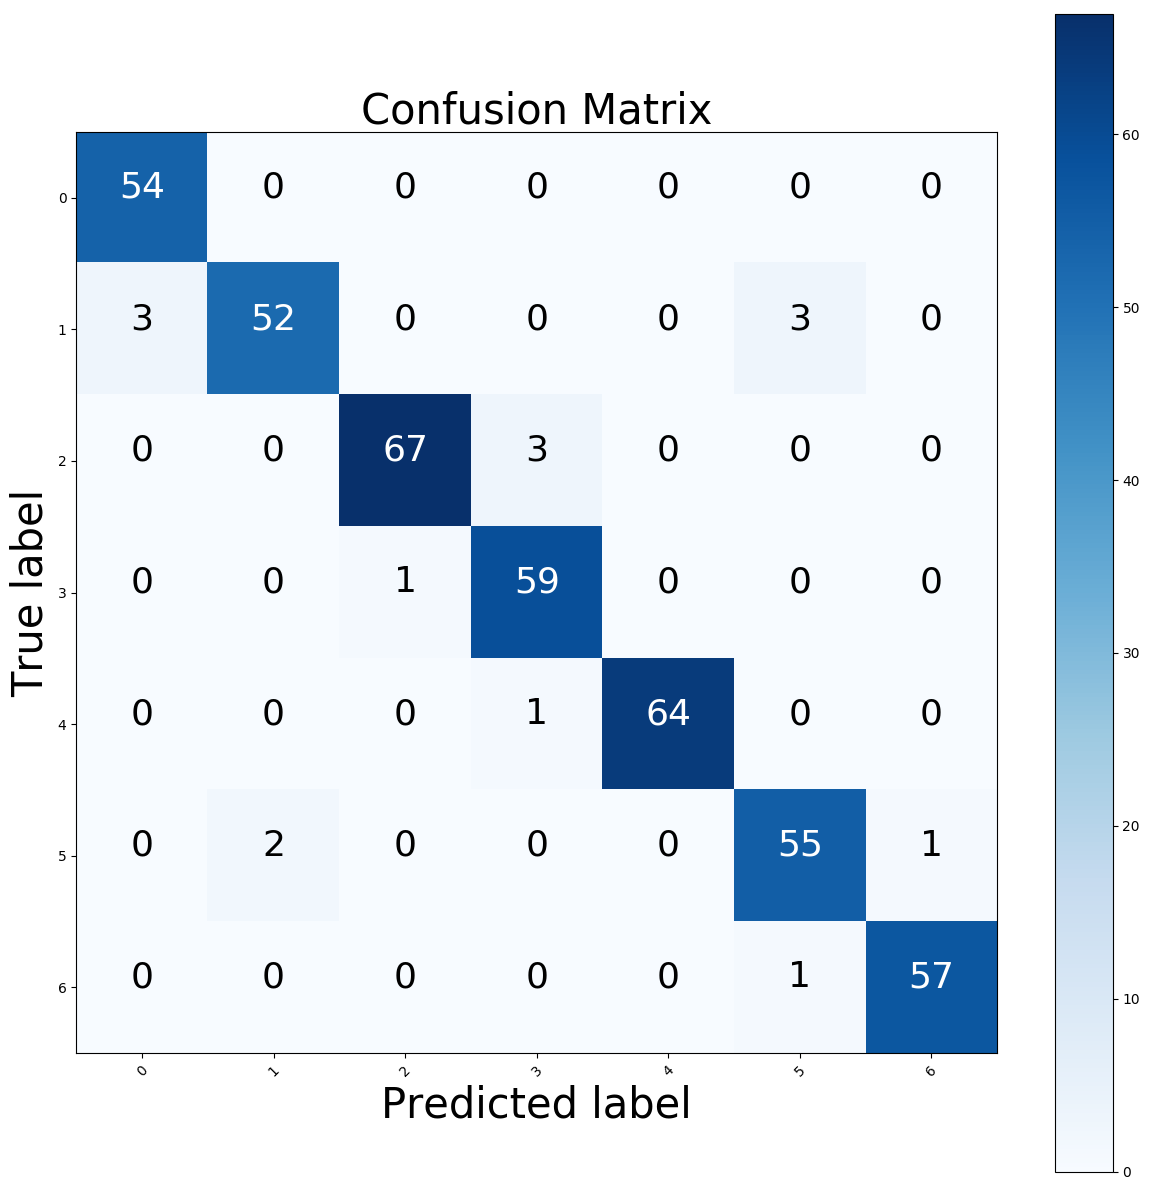

In [16]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)





Text(0.5,109.486,'Predicted label')

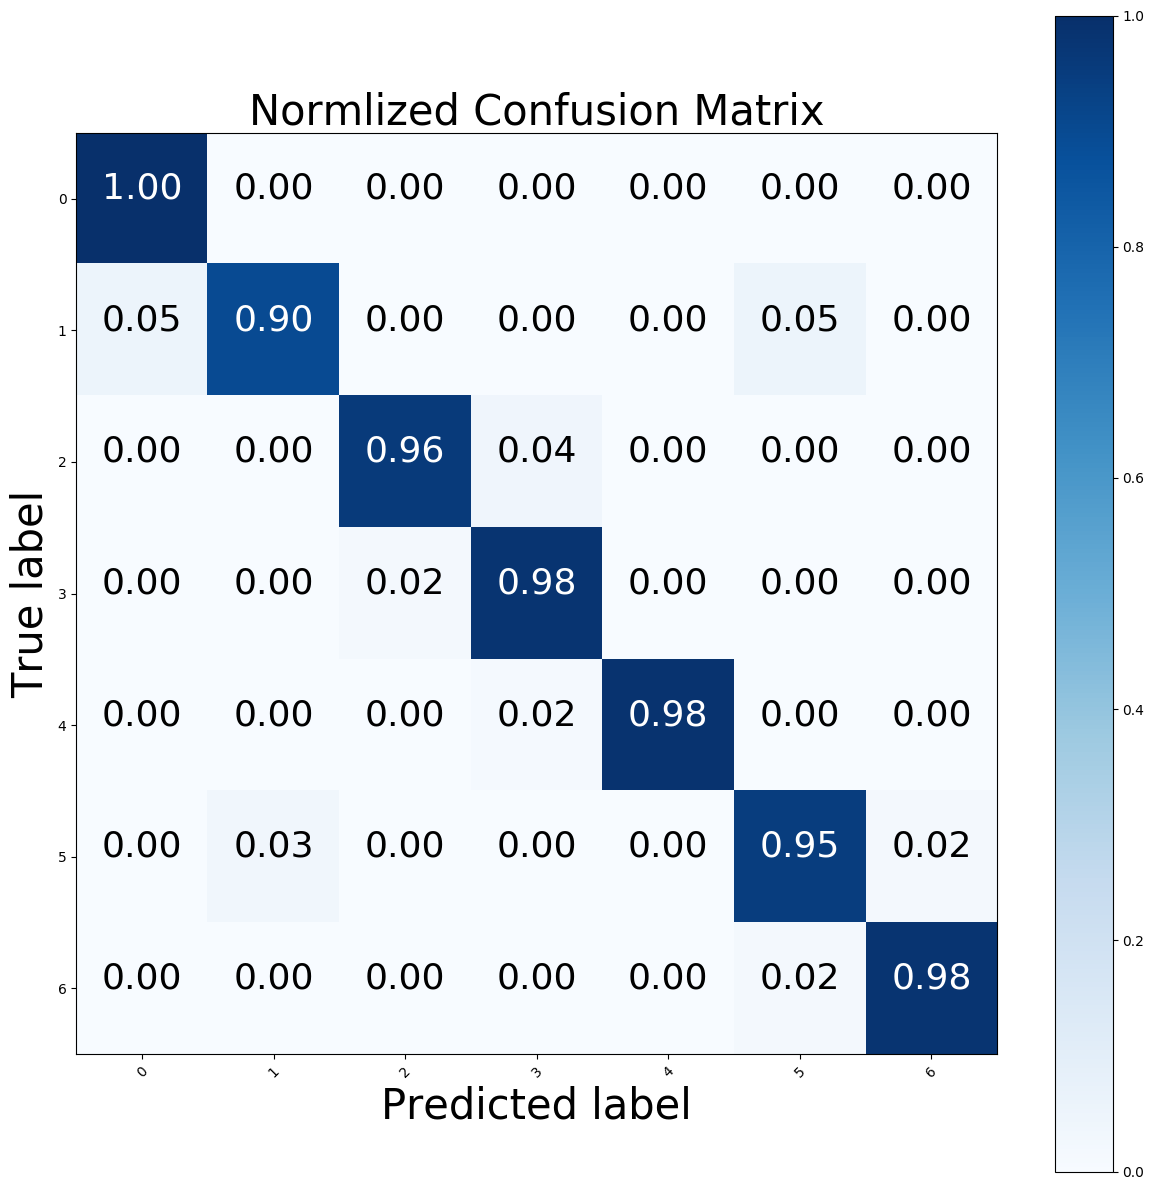

In [17]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [25]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# # precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  67   70   74   77   80   84   87   90   94   97  101  104  107  111
  114  117  121  124  127  131  134  198  262  326  389  453  517  581
  645  708  772  836  900  964 1027 1091 1155 1219 1283 1347]
[CV]  ................................................................

[CV] ....................... , score=0.6158357771260997, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6217008797653959, total=   0.0s[CV]  ................................................................[CV]  ................................................................[CV]  ................................................................


[CV]  ................................................................
[CV] ....................... , score=0.6627565982404692, total=   0.0s[CV] ....................... , score=0.6392961876832844, total=   0.0s

[CV] ....................... , score=0.6304985337

[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    0.1s remaining:    2.3s


[CV]  ................................................................[CV] ....................... , score=0.9384164222873901, total=   0.0s[CV]  ................................................................


[CV]  ................................................................
[CV] ....................... , score=0.9442815249266863, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9472140762463344, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9472140762463344, total=   0.0s[CV] ....................... , score=0.9589442815249267, total=   0.1s

[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.9501466275659824, total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:    0.4s remaining:    2.0s


[CV]  ................................................................[CV] ....................... , score=0.7088235294117647, total=   0.0s[CV] ........................ , score=0.711764705882353, total=   0.0s

[CV] ....................... , score=0.6823529411764706, total=   0.0s

[CV]  ................................................................[CV]  ................................................................[CV] ....................... , score=0.6794117647058824, total=   0.0s
[CV]  ................................................................

[CV] ....................... , score=0.6852941176470588, total=   0.0s
[CV]  ................................................................

[CV]  ................................................................[CV] ....................... , score=0.7323529411764705, total=   0.0s
[CV] ..................................... , score=0.75, total=   0.0s

[CV] ....................... , score=0.7441176470588236, total=   0.0s[CV]  .

[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:    0.6s remaining:    1.7s



[CV] ....................... , score=0.9382352941176471, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9411764705882353, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9382352941176471, total=   0.1s
[CV]  ................................................................[CV] ..................................... , score=0.95, total=   0.1s

[CV]  ................................................................
[CV] ....................... , score=0.9558823529411765, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9441176470588235, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.5875370919881305, total=   0.0s
[CV]  ................................................................
[CV] 

[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:    0.9s remaining:    1.5s



[CV] ....................... , score=0.7537091988130564, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.7537091988130564, total=   0.0s


[CV]  ................................................................[CV] ....................... , score=0.7537091988130564, total=   0.0s[CV]  ................................................................


[CV] ....................... , score=0.7626112759643917, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.7833827893175074, total=   0.0s


[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.8338278931750742, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8902077151335311, total=   0.0s

[CV] 

[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:    1.1s remaining:    1.2s


[CV] ....................... , score=0.9317507418397626, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9317507418397626, total=   0.1s
[CV]  ................................................................[CV] ....................... , score=0.9376854599406528, total=   0.1s

[CV]  ................................................................
[CV] ....................... , score=0.9406528189910979, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9376854599406528, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6398809523809523, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6279761904761905, total=   0.0s[CV] ....................... , score=0.9376854599406528, total=   0.1s

[CV]  

[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:    1.4s remaining:    1.0s
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:    1.5s remaining:    0.7s



[CV] ....................... , score=0.9136904761904762, total=   0.0s[CV] ................................... , score=0.9375, total=   0.0s

[CV]  ................................................................[CV]  ................................................................
[CV] ....................... , score=0.9464285714285714, total=   0.0s[CV]  ................................................................


[CV]  ................................................................
[CV] ....................... , score=0.9523809523809523, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.9434523809523809, total=   0.0s
[CV] ....................... , score=0.9434523809523809, total=   0.0s

[CV]  ................................................................
[CV]  ................................................................[CV] ....................... , score=0.9464285714285714, total=   0.0s

[CV] 

[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:    2.0s remaining:    0.2s



[CV] ....................... , score=0.8982035928143712, total=   0.0s
[CV] ....................... , score=0.8862275449101796, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.9101796407185628, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9161676646706587, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9311377245508982, total=   0.0s[CV] ....................... , score=0.9191616766467066, total=   0.0s

[CV]  ................................................................[CV]  ................................................................

[CV] ........................ , score=0.937125748502994, total=   0.0s
[CV]  ................................................................
[CV] 

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.3s finished


In [19]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # ---------------------------------------------------------------


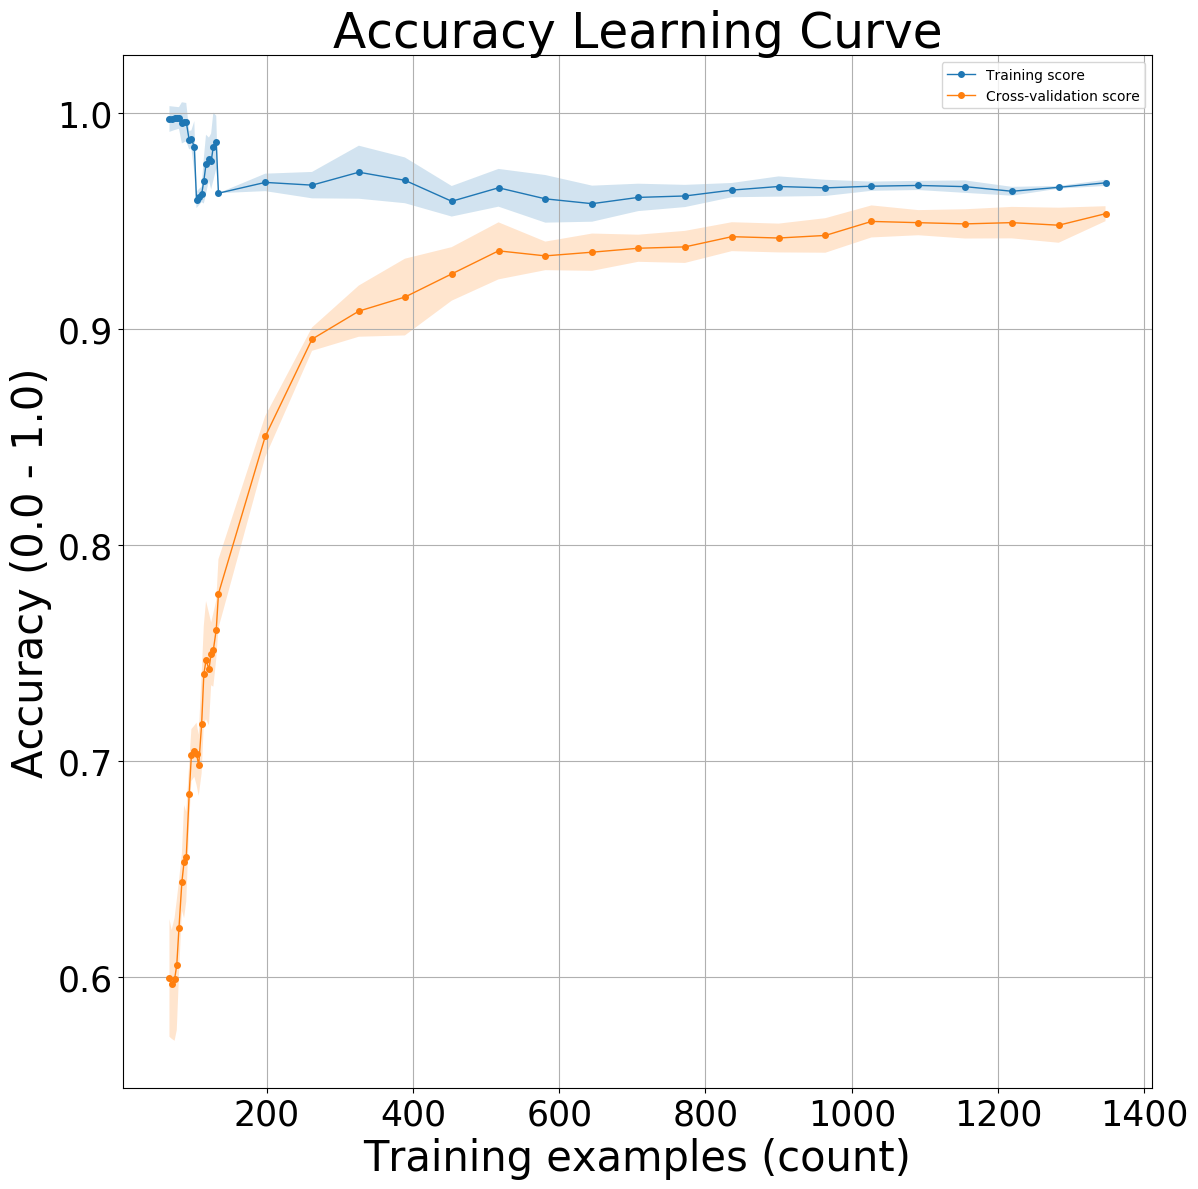

In [26]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------


In [20]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # -------------------------------------------


In [21]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# -------------------------------------------


In [22]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: C

In [28]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "C", C_values, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)

accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "C", C_values, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "C", C_values, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "C", C_values, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "C",C_values, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

In [29]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: C_values', fontsize=20)

# plt.xlabel('C_values', fontsize=15)
# plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = C_values

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

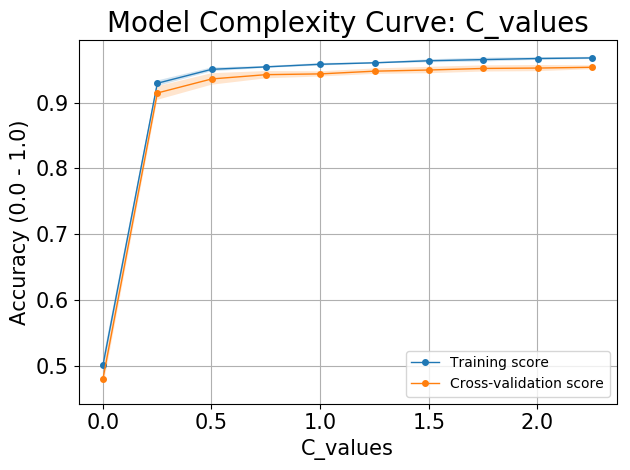

In [31]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: C_values', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('C_values', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = C_values

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


In [26]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: C_values')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = C_values

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [27]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: C_values')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = C_values

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [28]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: C_values')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = C_values

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [32]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

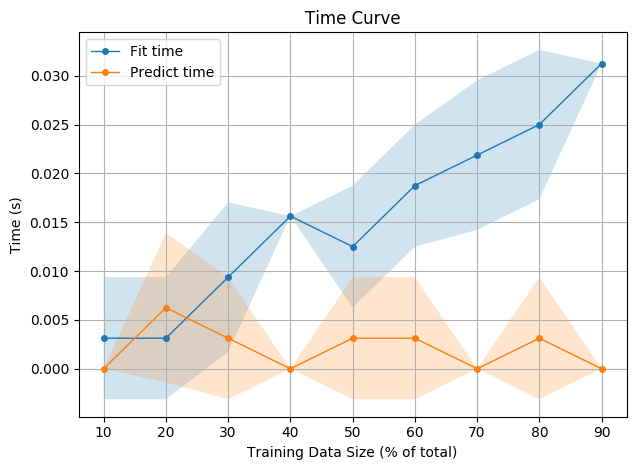

In [33]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [34]:
print(fit_scores_mean)
print(predict_scores_mean)

[0.003125 0.003125 0.009375 0.015625 0.0125   0.01875  0.021875 0.025
 0.03125 ]
[0.       0.00625  0.003125 0.       0.003125 0.003125 0.       0.003125
 0.      ]
